- 청크 임베딩 벡터의 윈도우는 청크 여러 문장의 일부를 대표하지 않을까?  
- 벡터의 의미는 그렇지만 문장의 전후 순서에 따라 전에 강한 영향을 받아 그렇다고 하기 어려움  
- 그렇다면 문장의 전후 위치에 따라 감소되는 강도를 강화하면 답이 있지 않을까?
- 그런데 비교문장이 청크의 어느부분에 위치하는지를 몰라서 불가능하겠는데
- 응, 그러면 비교문장의 차원 벡터 크기가 큰 부분만을 비교해보면 어떨까?
- 테스트 결과 오락가락 하는데 이유가 뭘까?


Cosine Similarity: -0.9824


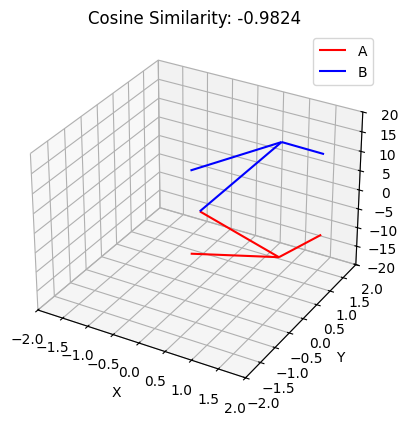

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# 벡터 정의
A = np.array([1, 1, -15])
B = np.array([1, 1, 15])

# 코사인 유사도 계산
cos_sim = cosine_similarity([A], [B])[0][0]

# 출력
print(f"Cosine Similarity: {cos_sim:.4f}")

# 시각화
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 벡터 그리기
origin = [0, 0, 0]
ax.quiver(*origin, *A, color='r', label='A')
ax.quiver(*origin, *B, color='b', label='B')

ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_zlim([-20, 20])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.title(f'Cosine Similarity: {cos_sim:.4f}')
plt.show()

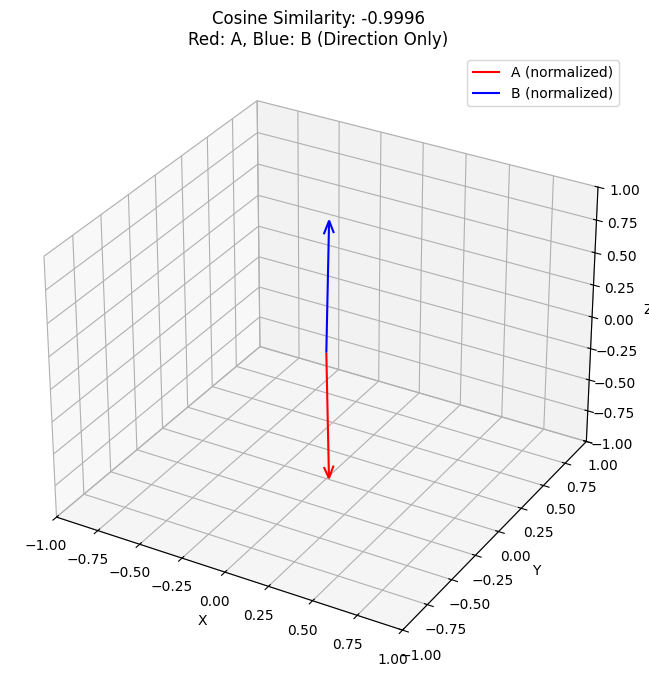

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# 벡터 정의
A = np.array([1, 1, -100])
B = np.array([1, 1, 100])

# 코사인 유사도 계산
cos_sim = cosine_similarity([A], [B])[0][0]

# 시각화를 위한 정규화된 벡터 (방향만 강조)
A_unit = A / np.linalg.norm(A)
B_unit = B / np.linalg.norm(B)

# 시각화
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 원점
origin = [0, 0, 0]

# 벡터 그리기 (방향만 표시)
ax.quiver(*origin, *A_unit, length=1.0, color='r', label='A (normalized)', arrow_length_ratio=0.1)
ax.quiver(*origin, *B_unit, length=1.0, color='b', label='B (normalized)', arrow_length_ratio=0.1)

# 좌표계 설정
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# 제목 및 범례
ax.set_title(f'Cosine Similarity: {cos_sim:.4f}\nRed: A, Blue: B (Direction Only)')
ax.legend()

plt.show()

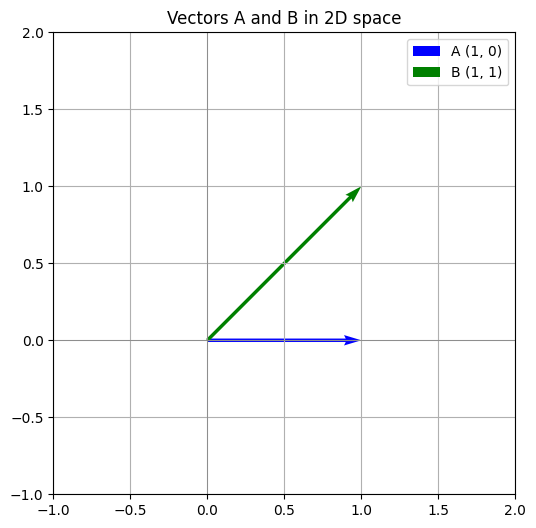

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# 벡터 A와 B 정의
A = np.array([1, 0])
B = np.array([1, 1])

# 원점
origin = [0], [0]

# 그래프 그리기
plt.figure(figsize=(6, 6))
plt.quiver(*origin, A[0], A[1], angles='xy', scale_units='xy', scale=1, color='blue', label='A (1, 0)')
plt.quiver(*origin, B[0], B[1], angles='xy', scale_units='xy', scale=1, color='green', label='B (1, 1)')

# 축 설정
plt.xlim(-1, 2)
plt.ylim(-1, 2)
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.title('Vectors A and B in 2D space')

plt.show()

###2차원 임베딩 모델에서 l love you. 와 l like you. 임베딩 결과
- 문장간에는 이렇지만 청크를 임베딩할 경우 1개 문장으로 임베딩 되어 비교문장이 있다고 하더라도 전후 위치에 따라 유사도가 크게 차이가 날거야

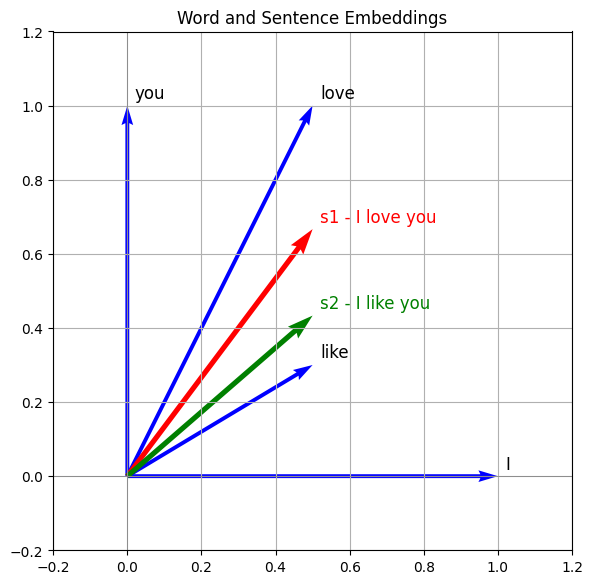

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# 수동 벡터 정의
word_vectors = {
    "I": np.array([1.0, 0.0]),
    "love": np.array([0.5, 1.0]),
    "like": np.array([0.5, 0.3]),
    "you": np.array([0.0, 1.0]),
}

# 문장 정의
s1_words = ["I", "love", "you"]
s2_words = ["I", "like", "you"]

# 문장 임베딩 계산
def sentence_embedding(words):
    vectors = [word_vectors[w] for w in words]
    return np.mean(vectors, axis=0)

emb1 = sentence_embedding(s1_words)
emb2 = sentence_embedding(s2_words)

# 시각화
plt.figure(figsize=(6, 6))
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)

# 단어 벡터
for word, vec in word_vectors.items():
    plt.quiver(0, 0, vec[0], vec[1], angles='xy', scale_units='xy', scale=1, color='blue')
    plt.text(vec[0]+0.02, vec[1]+0.02, word, fontsize=12)

# 문장 벡터
plt.quiver(0, 0, emb1[0], emb1[1], angles='xy', scale_units='xy', scale=1, color='red', width=0.01)
plt.text(emb1[0]+0.02, emb1[1]+0.02, "s1 - I love you", fontsize=12, color='red')

plt.quiver(0, 0, emb2[0], emb2[1], angles='xy', scale_units='xy', scale=1, color='green', width=0.01)
plt.text(emb2[0]+0.02, emb2[1]+0.02, "s2 - I like you", fontsize=12, color='green')

plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
plt.gca().set_aspect('equal')
plt.title("Word and Sentence Embeddings")
plt.grid(True)
plt.tight_layout()
plt.show()

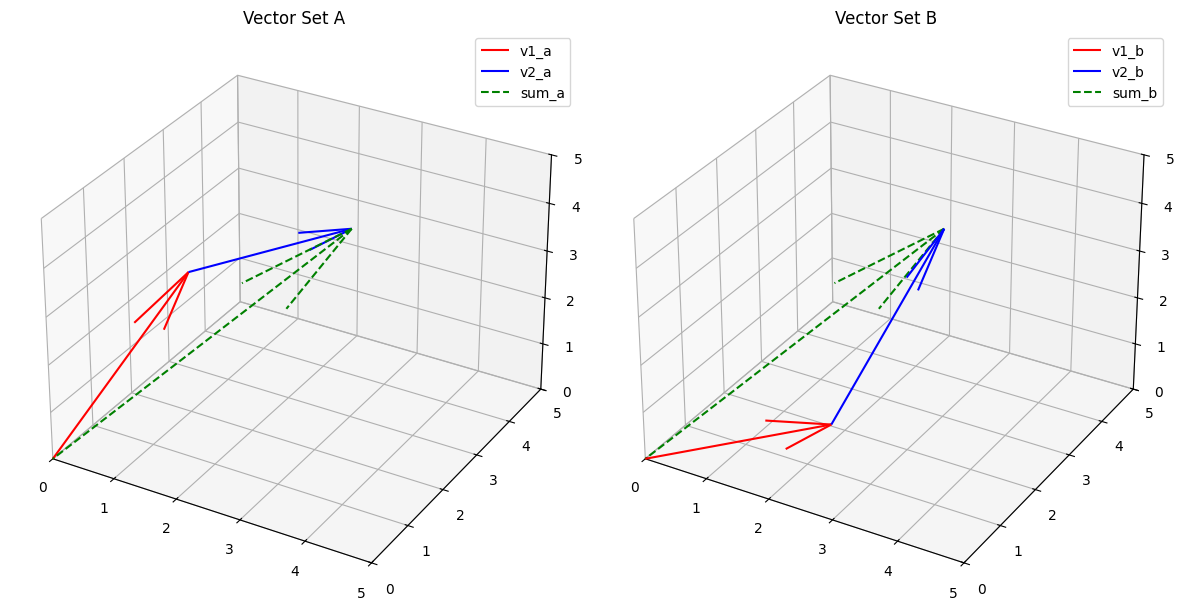

In [ ]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 두 쌍의 벡터 (합성 벡터는 같음)
# 첫 번째 세트
v1_a = np.array([1, 2, 3])
v2_a = np.array([2, 1, 1])
sum_a = v1_a + v2_a

# 두 번째 세트
v1_b = np.array([3, 0, 2])
v2_b = np.array([0, 3, 2])
sum_b = v1_b + v2_b

# 3D 그래프 설정
fig = plt.figure(figsize=(12, 6))

# 첫 번째 그래프
ax1 = fig.add_subplot(121, projection='3d')
ax1.quiver(0, 0, 0, *v1_a, color='r', label='v1_a')
ax1.quiver(*v1_a, *v2_a, color='b', label='v2_a')
ax1.quiver(0, 0, 0, *sum_a, color='g', linestyle='dashed', label='sum_a')
ax1.set_xlim([0, 5])
ax1.set_ylim([0, 5])
ax1.set_zlim([0, 5])
ax1.set_title('Vector Set A')
ax1.legend()

# 두 번째 그래프
ax2 = fig.add_subplot(122, projection='3d')
ax2.quiver(0, 0, 0, *v1_b, color='r', label='v1_b')
ax2.quiver(*v1_b, *v2_b, color='b', label='v2_b')
ax2.quiver(0, 0, 0, *sum_b, color='g', linestyle='dashed', label='sum_b')
ax2.set_xlim([0, 5])
ax2.set_ylim([0, 5])
ax2.set_zlim([0, 5])
ax2.set_title('Vector Set B')
ax2.legend()

plt.tight_layout()
plt.show()

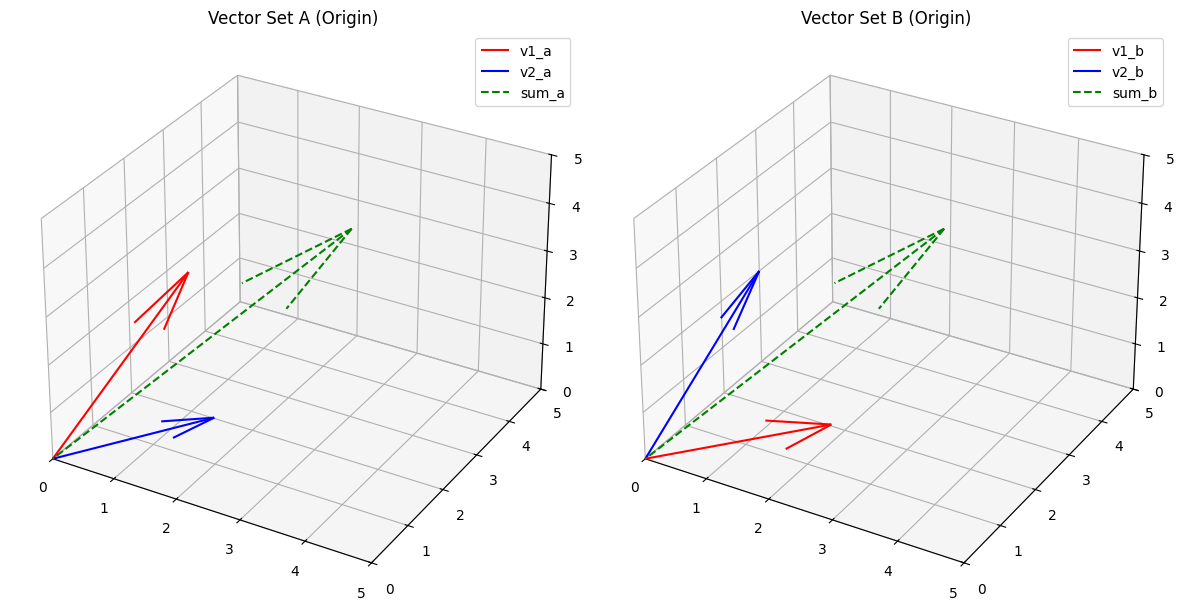

In [ ]:

# 3D 그래프 설정 (원점 기준으로 모두 표현)

fig = plt.figure(figsize=(12, 6))

# 첫 번째 그래프 (원점 기준으로 모든 벡터 표시)
ax1 = fig.add_subplot(121, projection='3d')
ax1.quiver(0, 0, 0, *v1_a, color='r', label='v1_a')
ax1.quiver(0, 0, 0, *v2_a, color='b', label='v2_a')
ax1.quiver(0, 0, 0, *sum_a, color='g', linestyle='dashed', label='sum_a')
ax1.set_xlim([0, 5])
ax1.set_ylim([0, 5])
ax1.set_zlim([0, 5])
ax1.set_title('Vector Set A (Origin)')
ax1.legend()

# 두 번째 그래프 (원점 기준으로 모든 벡터 표시)
ax2 = fig.add_subplot(122, projection='3d')
ax2.quiver(0, 0, 0, *v1_b, color='r', label='v1_b')
ax2.quiver(0, 0, 0, *v2_b, color='b', label='v2_b')
ax2.quiver(0, 0, 0, *sum_b, color='g', linestyle='dashed', label='sum_b')
ax2.set_xlim([0, 5])
ax2.set_ylim([0, 5])
ax2.set_zlim([0, 5])
ax2.set_title('Vector Set B (Origin)')
ax2.legend()

plt.tight_layout()
plt.show()

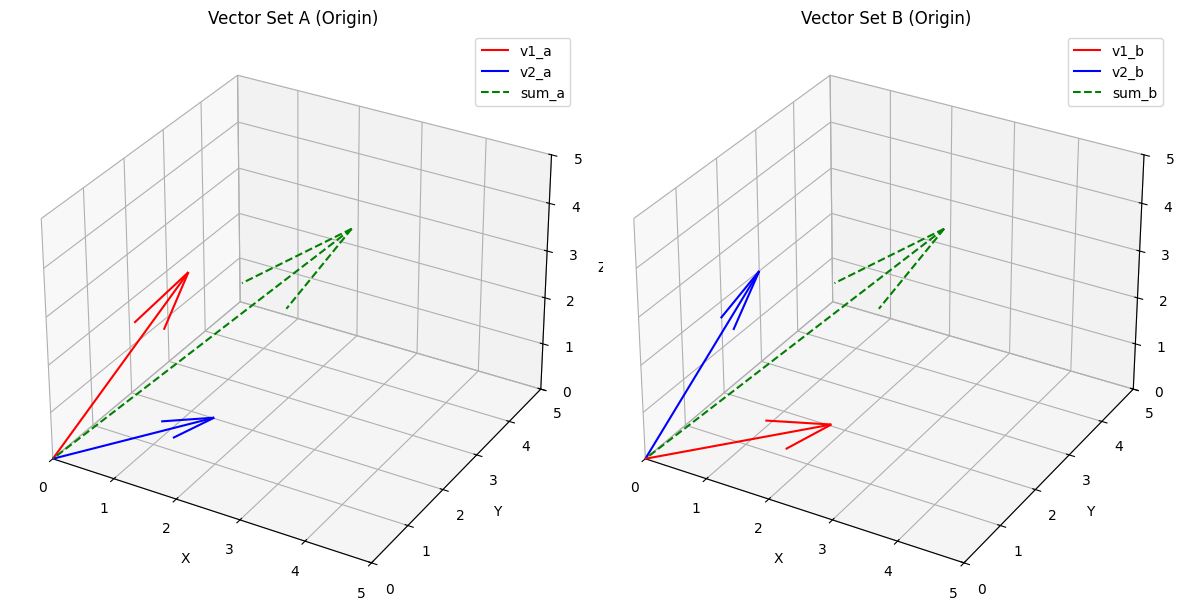

In [ ]:

# 최대 좌표값 계산
all_vectors = np.array([v1_a, v2_a, sum_a, v1_b, v2_b, sum_b])
max_range = np.max(np.abs(all_vectors)) + 1  # 여유 공간을 위해 +1

fig = plt.figure(figsize=(12, 6))

# 첫 번째 그래프
ax1 = fig.add_subplot(121, projection='3d')
ax1.quiver(0, 0, 0, *v1_a, color='r', label='v1_a')
ax1.quiver(0, 0, 0, *v2_a, color='b', label='v2_a')
ax1.quiver(0, 0, 0, *sum_a, color='g', linestyle='dashed', label='sum_a')
ax1.set_xlim([0, max_range])
ax1.set_ylim([0, max_range])
ax1.set_zlim([0, max_range])
ax1.set_title('Vector Set A (Origin)')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.legend()

# 두 번째 그래프
ax2 = fig.add_subplot(122, projection='3d')
ax2.quiver(0, 0, 0, *v1_b, color='r', label='v1_b')
ax2.quiver(0, 0, 0, *v2_b, color='b', label='v2_b')
ax2.quiver(0, 0, 0, *sum_b, color='g', linestyle='dashed', label='sum_b')
ax2.set_xlim([0, max_range])
ax2.set_ylim([0, max_range])
ax2.set_zlim([0, max_range])
ax2.set_title('Vector Set B (Origin)')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.legend()

plt.tight_layout()
plt.show()

In [ ]:

import plotly.graph_objects as go
import numpy as np

x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
x, y = np.meshgrid(x, y)
z = np.sin(np.sqrt(x**2 + y**2))

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.show()

In [ ]:

import plotly.graph_objects as go
import numpy as np

# 벡터 정의
v1 = np.array([3, 0, 2])
v2 = np.array([0, 3, 1])
v_sum = v1 + v2

# 기준점
origin = [0, 0, 0]

fig = go.Figure()

# 벡터 1
fig.add_trace(go.Scatter3d(
    x=[0, v1[0]], y=[0, v1[1]], z=[0, v1[2]],
    mode='lines+markers',
    name='Vector 1',
    line=dict(width=5),
    marker=dict(size=4)
))

# 벡터 2
fig.add_trace(go.Scatter3d(
    x=[0, v2[0]], y=[0, v2[1]], z=[0, v2[2]],
    mode='lines+markers',
    name='Vector 2',
    line=dict(width=5),
    marker=dict(size=4)
))

# 합성 벡터
fig.add_trace(go.Scatter3d(
    x=[0, v_sum[0]], y=[0, v_sum[1]], z=[0, v_sum[2]],
    mode='lines+markers',
    name='Vector Sum',
    line=dict(width=5, dash='dash'),
    marker=dict(size=4)
))

# 레이아웃 설정
fig.update_layout(
    scene=dict(
        xaxis=dict(range=[0, 5]),
        yaxis=dict(range=[0, 5]),
        zaxis=dict(range=[0, 5])
    ),
    title="3D Vector Visualization",
    width=600,
    margin=dict(r=20, l=20, b=20, t=20)
)

fig.show()

- 10개 평면의 값을 1면에서 투영해 보면 이렇게 보여
- 이 것을 정리하면 선분으로 정리하면, 다음 그림과 같아

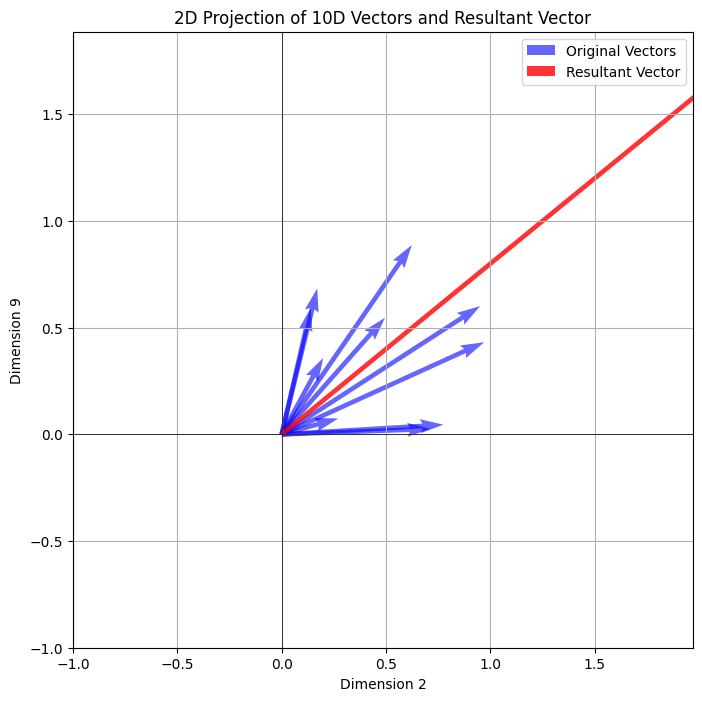

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# 10차원 공간에 있는 임의의 벡터 생성
np.random.seed(42)
vectors_10d = np.random.rand(10, 10)  # 10차원 공간에 10개 벡터 생성

# 10차원 벡터들을 합성하여 합성벡터 생성
resultant_vector_10d = np.sum(vectors_10d, axis=0)

# 임의의 2개 차원을 선택하여 2차원 평면에 투영
dim_x, dim_y = np.random.choice(10, 2, replace=False)

# 선택된 2차원에서의 벡터와 합성벡터 투영
vectors_2d = vectors_10d[:, [dim_x, dim_y]]
resultant_vector_2d = resultant_vector_10d[[dim_x, dim_y]]

# 그래프 그리기
plt.figure(figsize=(8, 8))
plt.quiver(np.zeros(10), np.zeros(10), vectors_2d[:, 0], vectors_2d[:, 1], angles='xy', scale_units='xy', scale=1, color='blue', alpha=0.6, label='Original Vectors')
plt.quiver(0, 0, resultant_vector_2d[0], resultant_vector_2d[1], angles='xy', scale_units='xy', scale=1, color='red', alpha=0.8, label='Resultant Vector')

plt.xlim(-1, np.max(vectors_2d[:,0]) + 1)
plt.ylim(-1, np.max(vectors_2d[:,1]) + 1)
plt.xlabel(f'Dimension {dim_x+1}')
plt.ylabel(f'Dimension {dim_y+1}')
plt.title('2D Projection of 10D Vectors and Resultant Vector')
plt.grid(True)
plt.legend()
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()

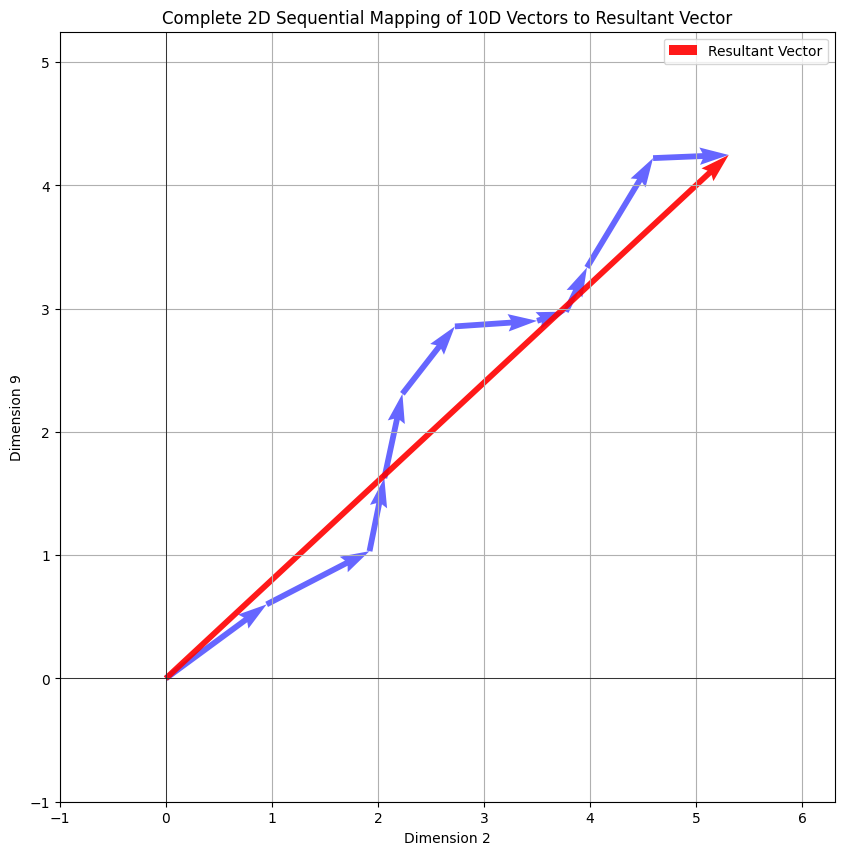

In [ ]:

# 그래프가 전체적으로 잘 보이도록 축 범위를 자동으로 조정하여 다시 그리기

plt.figure(figsize=(10, 10))

# 초기점 설정 (원점에서 시작)
current_point = np.zeros(2)

# 원본 벡터들 연결하여 그리기
for vec in vectors_2d:
    plt.quiver(current_point[0], current_point[1], vec[0], vec[1],
               angles='xy', scale_units='xy', scale=1, color='blue', alpha=0.6)
    current_point += vec

# 합성 벡터 (최종 벡터) 그리기
plt.quiver(0, 0, resultant_vector_2d[0], resultant_vector_2d[1],
           angles='xy', scale_units='xy', scale=1, color='red', alpha=0.9, label='Resultant Vector')

# 축 범위를 전체 벡터들의 누적 합에 맞게 조정
margin = 1
plt.xlim(min(0, current_point[0]) - margin, current_point[0] + margin)
plt.ylim(min(0, current_point[1]) - margin, current_point[1] + margin)

plt.xlabel(f'Dimension {dim_x+1}')
plt.ylabel(f'Dimension {dim_y+1}')
plt.title('Complete 2D Sequential Mapping of 10D Vectors to Resultant Vector')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.show()

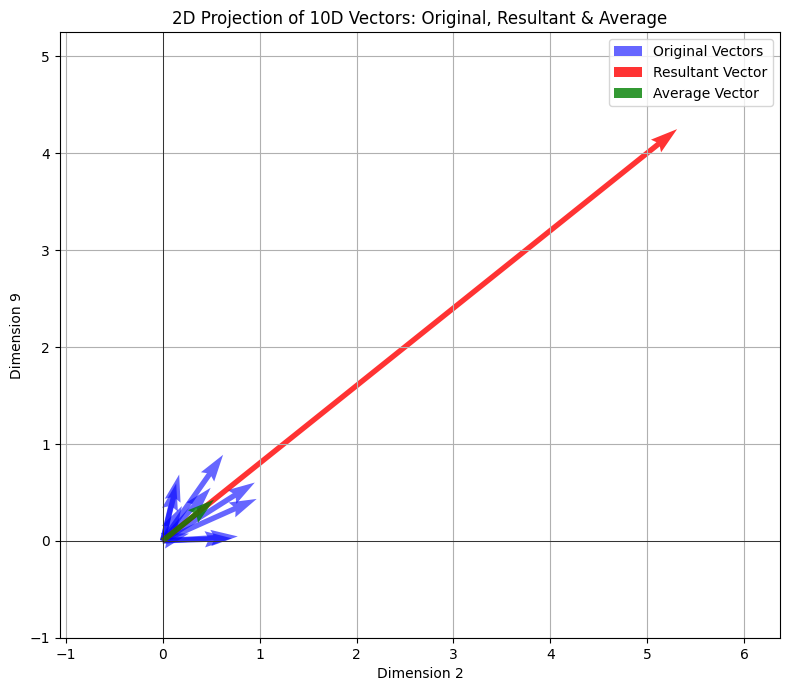

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 10차원 → 2차원 투영 데이터 (이전과 동일)
np.random.seed(42)
vectors_10d = np.random.rand(10, 10)
resultant_vector_10d = np.sum(vectors_10d, axis=0)
dim_x, dim_y = np.random.choice(10, 2, replace=False)
vectors_2d = vectors_10d[:, [dim_x, dim_y]]
resultant_vector_2d = resultant_vector_10d[[dim_x, dim_y]]
average_vector_2d = resultant_vector_2d / vectors_2d.shape[0]

fig, ax = plt.subplots(figsize=(8, 8))

# 1) 원본 벡터
ax.quiver(
    np.zeros(vectors_2d.shape[0]), np.zeros(vectors_2d.shape[0]),
    vectors_2d[:, 0], vectors_2d[:, 1],
    angles='xy', scale_units='xy', scale=1,
    color='blue', alpha=0.6, label='Original Vectors'
)

# 2) 합성 벡터
ax.quiver(
    0, 0,
    resultant_vector_2d[0], resultant_vector_2d[1],
    angles='xy', scale_units='xy', scale=1,
    color='red', alpha=0.8, label='Resultant Vector'
)

# 3) 평균 벡터
ax.quiver(
    0, 0,
    average_vector_2d[0], average_vector_2d[1],
    angles='xy', scale_units='xy', scale=1,
    color='green', alpha=0.8, label='Average Vector'
)

# ——— 여기서 축 범위 계산 ———
# (0,0) + 모든 끝점(endpoints)을 모은 뒤,
# x축, y축 각각에 대해 최소값/최대값을 구하고
# 20% 여유(minimum 1.0)를 더합니다.
all_x = np.hstack([0, vectors_2d[:, 0], resultant_vector_2d[0], average_vector_2d[0]])
all_y = np.hstack([0, vectors_2d[:, 1], resultant_vector_2d[1], average_vector_2d[1]])

min_x, max_x = all_x.min(), all_x.max()
min_y, max_y = all_y.min(), all_y.max()

range_x = max_x - min_x
range_y = max_y - min_y

margin_x = max(range_x * 0.2, 1.0)
margin_y = max(range_y * 0.2, 1.0)

ax.set_xlim(min_x - margin_x, max_x + margin_x)
ax.set_ylim(min_y - margin_y, max_y + margin_y)
ax.set_aspect('equal', 'box')  # x,y 축 스케일 동일

# ——— 스타일링 ———
ax.set_xlabel(f'Dimension {dim_x+1}')
ax.set_ylabel(f'Dimension {dim_y+1}')
ax.set_title('2D Projection of 10D Vectors: Original, Resultant & Average')
ax.grid(True)
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.legend()
plt.tight_layout()
plt.show()



In [ ]:
!pip install pubchempy

  Preparing metadata (setup.py) ... done
  Created wheel for pubchempy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13819 sha256=2c3676932e261bcf07fb277398b10b8faaf269c4c07475ded56f0d0ad77c9b1f
  Stored in directory: /root/.cache/pip/wheels/8b/e3/6c/3385b2db08b0985a87f5b117f98d0cb61a3ae3ca3bcbbd8307
Successfully built pubchempy


In [ ]:

import pubchempy as pcp

compounds = pcp.get_compounds('C2H6O', 'formula')

smiles_list = [compound.isomeric_smiles for compound in compounds]
print(smiles_list)

['CCO', 'COC', '[2H]C([2H])([2H])C([2H])([2H])O[2H]', '[2H]OCC', '[2H]C([2H])(C)O', '[2H]C([2H])([2H])CO', 'C[13CH2]O', '[2H]C([2H])([2H])C([2H])([2H])O', 'C[14CH2]O', '[2H]C([2H])([2H])OC([2H])([2H])[2H]', '[13CH3][13CH2]O', '[13CH3]CO', 'CC[17OH]', '[2H]C([2H])([2H])OC', 'C=C.O', '[13CH3]O[13CH3]', 'C[11CH2]O', '[2H]C(C)O', '[2H]C([2H])CO', '[2H]C([2H])C([2H])([2H])O', '[2H]CCO', '[2H]CC([2H])([2H])O', '[H][C@]([2H])(C)O', '[2H]COC[2H]', '[H][C@@]([2H])(C)O', '[3H]C(C)O', 'CC[18OH]', '[2H]C(C)O[2H]', '[3H]OCC', '[2H]CC([2H])O', '[2H]C([2H])([2H])CO[2H]', 'C.C=O', '[2H]C(C([2H])([2H])[2H])O', '[2H]COC', '[3H]CCO', '[2H]C([2H])OC', '[2H][13C]([2H])(C)O[2H]', '[1H]C([2H])(C)O', 'C[17O]C', '[1H]OCC', '[2H]C(C[3H])O[2H]', '[2H]COC[3H]', '[3H]COC', 'C[CH-][OH2+]', 'CO[11CH3]', '[11CH3]O[11CH3]', 'C[10CH2]O', 'C[15CH2]O', 'C[20CH2]O', '[2H]C.[2H]C=O', '[3H]C=O.C', '[HH].C.[C-]#[O+]', '[2H]C([2H])C([2H])O', '[3H]C([3H])([3H])C([3H])([3H])O', '[3H]C([3H])(C)O', '[3H]CC([3H])O', '[2H]C([2H])([

In [ ]:

import pubchempy as pcp

compounds = pcp.get_compounds('H2O', 'formula')

smiles_list = [compound.isomeric_smiles for compound in compounds]
print(smiles_list)

['O', '[2H]O[2H]', '[3H]O[3H]', '[H+].[OH-]', '[15OH2]', '[3H]O', '[18OH2]', '[2H]O', '[17OH2]', '[19OH2]', '[16OH2]', '[OH2+]', '[1H]O[1H]', '[2H]O[3H]', '[13OH2]', '[14OH2]', '[1H]O', '[2H][18O][2H]', '[1H][16O][2H]']


In [ ]:

import numpy as np
from itertools import combinations
from numba import njit

# 512차원 벡터 생성 (예시)
vec1 = np.random.rand(512)
vec2 = np.random.rand(512)

# 조합 인덱스 리스트 생성
idx_pairs = np.array(list(combinations(range(512), 2)))

@njit
def cosine_sim_2d(v1_2d, v2_2d):
    dot = v1_2d[0] * v2_2d[0] + v1_2d[1] * v2_2d[1]
    norm1 = (v1_2d[0]**2 + v1_2d[1]**2)**0.5
    norm2 = (v2_2d[0]**2 + v2_2d[1]**2)**0.5
    if norm1 == 0.0 or norm2 == 0.0:
        return 0.0
    return dot / (norm1 * norm2)

@njit
def count_high_sim_pairs(vec1, vec2, idx_pairs, threshold=0.9999):
    count = 0
    for k in range(idx_pairs.shape[0]):
        i, j = idx_pairs[k]
        v1_2d = np.array([vec1[i], vec1[j]])
        v2_2d = np.array([vec2[i], vec2[j]])
        sim = cosine_sim_2d(v1_2d, v2_2d)
        if sim > threshold:
            count += 1
    return count

count = count_high_sim_pairs(vec1, vec2, idx_pairs)
print(f"유사도 > 0.7인 2차원 조합 개수: {count}")

유사도 > 0.7인 2차원 조합 개수: 2526


In [ ]:

import numpy as np
from itertools import combinations
from numba import njit

# 512차원 벡터 생성 (예시)
vec1 = np.random.rand(512)
vec2 = np.random.rand(512)

print(vec1, "\n\n")
print(vec2)

# 조합 인덱스 리스트 생성
idx_pairs = np.array(list(combinations(range(512), 2)))

@njit
def cosine_sim_2d(v1_2d, v2_2d):
    dot = v1_2d[0] * v2_2d[0] + v1_2d[1] * v2_2d[1]
    norm1 = (v1_2d[0]**2 + v1_2d[1]**2)**0.5
    norm2 = (v2_2d[0]**2 + v2_2d[1]**2)**0.5
    if norm1 == 0.0 or norm2 == 0.0:
        return 0.0
    return dot / (norm1 * norm2)

@njit
def count_high_sim_pairs(vec1, vec2, idx_pairs, threshold=0.9999):
    count = 0
    for k in range(idx_pairs.shape[0]):
        i, j = idx_pairs[k]
        v1_2d = np.array([vec1[i], vec1[j]])
        v2_2d = np.array([vec2[i], vec2[j]])
        sim = cosine_sim_2d(v1_2d, v2_2d)
        if sim > threshold:
            count += 1
    return count

# 전체 조합 개수
total_combinations = len(idx_pairs)

# 계산
count = count_high_sim_pairs(vec1, vec2, idx_pairs)

# 출력
print(f"전체 2차원 조합 개수: {total_combinations}")
print(f"유사도 > 0.7인 조합 개수: {count}")

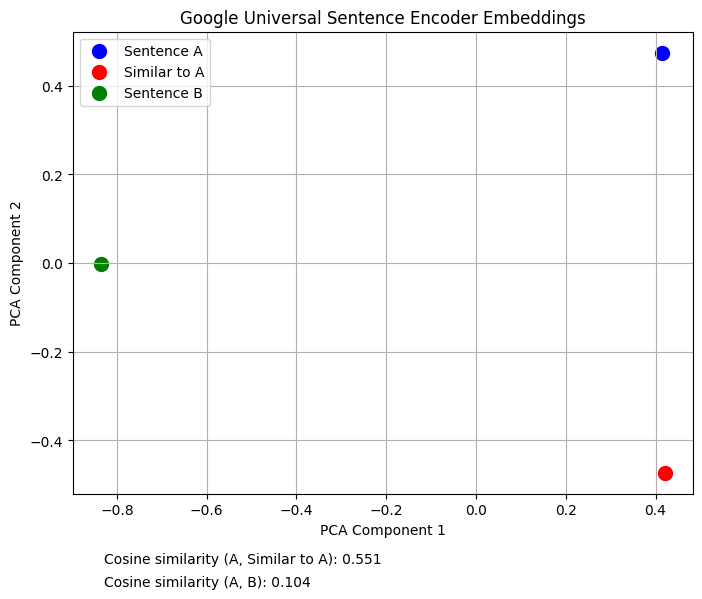

In [ ]:

# 실제 구글 임베딩 모델을 활용한 예제
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import tensorflow_hub as hub

# 구글 유니버설 센텐스 인코더 로드
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# 문장 정의
sentences = [
    "The weather is nice today.",          # 문장 A
    "I enjoy walking in sunny weather.",   # 문장 A와 비슷한 문장
    "The stock market crashed suddenly."   # 서로 다른 문장 B
]

# 문장 임베딩
sentence_embeddings = embed(sentences).numpy()

# PCA로 차원 축소 (시각화 목적)
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(sentence_embeddings)

# 그래프 그리기
labels = ['Sentence A', 'Similar to A', 'Sentence B']
colors = ['blue', 'red', 'green']

plt.figure(figsize=(8, 6))
for i, label in enumerate(labels):
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], color=colors[i], label=label, s=100)

# 코사인 유사도 계산
cos_sim_a_similar = cosine_similarity([sentence_embeddings[0]], [sentence_embeddings[1]])[0][0]
cos_sim_a_b = cosine_similarity([sentence_embeddings[0]], [sentence_embeddings[2]])[0][0]

plt.title('Google Universal Sentence Encoder Embeddings')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)

# 코사인 유사도 결과 텍스트 추가
plt.text(0.05, -0.15, f'Cosine similarity (A, Similar to A): {cos_sim_a_similar:.3f}', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.05, -0.20, f'Cosine similarity (A, B): {cos_sim_a_b:.3f}', fontsize=10, transform=plt.gca().transAxes)

plt.show()

# 임베딩 모델에 따라 달라지는 임베딩 결과

(384,)
(384,)
(384,)


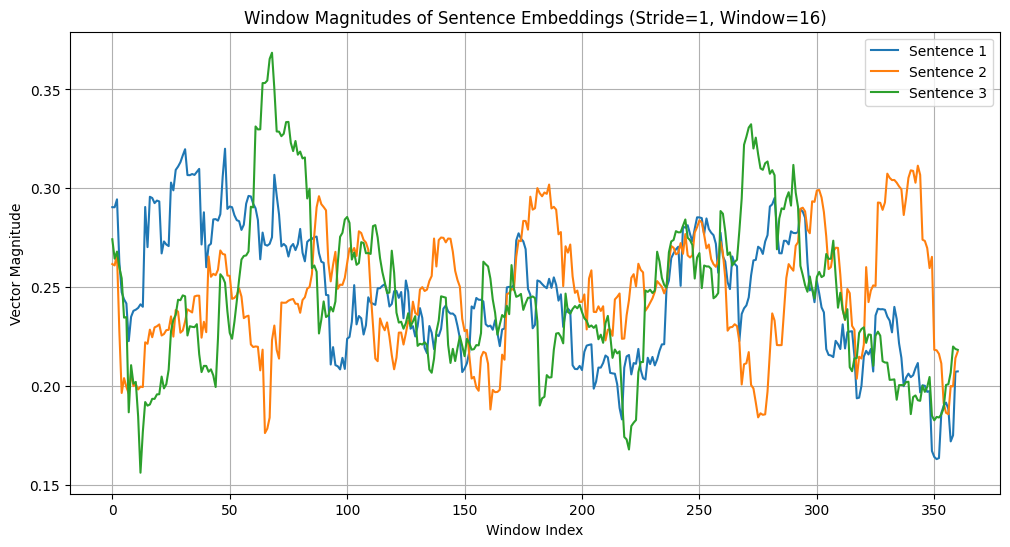

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer


model = SentenceTransformer('all-MiniLM-L6-v2')


sentences = [
    "I love sunny weather and going outside.",
    "The weather forecast predicts sunshine today.",
    "Economic growth has slowed down significantly."
]


window_size = 24
stride = 1
num_windows = (384 - window_size) // stride + 1
window_magnitudes = np.zeros((len(sentences), num_windows))

embeddings = model.encode(sentences)
#embeddings = model(sentences)

for idx, embedding in enumerate(embeddings):
    print(embedding.shape)
    for i in range(num_windows):
        window = embedding[i:i + window_size]
        window_magnitudes[idx, i] = np.linalg.norm(window)

plt.figure(figsize=(12, 6))
for idx, sentence in enumerate(sentences):
    plt.plot(window_magnitudes[idx], label=f'Sentence {idx+1}')

plt.title('Window Magnitudes of Sentence Embeddings (Stride=1, Window=16)')
plt.xlabel('Window Index')
plt.ylabel('Vector Magnitude')
plt.legend()
plt.grid(True)
plt.show()

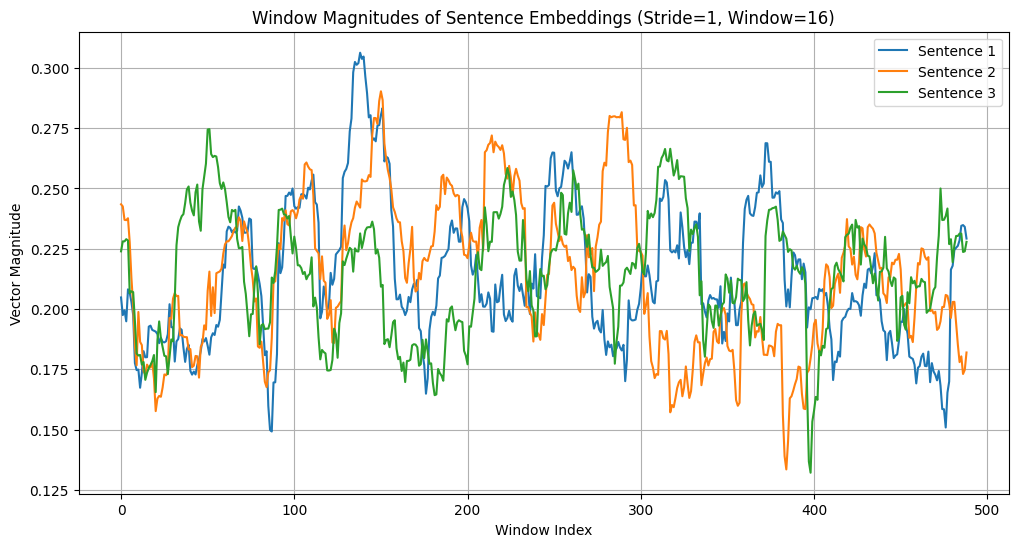

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_text
import tensorflow_hub as hub

model_url = "https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3"
model = hub.load(model_url)

# sentences = [
#     "I love sunny weather", # and going outside.",
#     "The weather forecast predicts sunshine today.",
#     "By region, the North American market is expected to grow from USD 354.81 million in 2022 to USD 640.44 million by 2029, registering a CAGR of 9.18%. The Asia-Pacific market is projected to expand from USD 698.14 million in 2022 to USD 1,268.48 million by 2029, growing at a CAGR of 9.72%. Additionally, the European market is forecast to reach USD 663.27 million by 2029 from USD 395.73 million in 2022, growing at a CAGR of 8.37%. Economic growth has slowed down significantly. Window Magnitudes of Sentence Embeddings."
# ]

sentences = [
    "I love sunny weather and going outside.",
    "The weather forecast predicts sunshine today.",
    "Economic growth has slowed down significantly."
]

embeddings = model(sentences)

window_size = 24
stride = 1
num_windows = (512 - window_size) // stride + 1
window_magnitudes = np.zeros((len(sentences), num_windows))

for idx, embedding in enumerate(embeddings):
    for i in range(num_windows):
        window = embedding[i:i + window_size]
        window_magnitudes[idx, i] = np.linalg.norm(window)

plt.figure(figsize=(12, 6))
for idx, sentence in enumerate(sentences):
    plt.plot(window_magnitudes[idx], label=f'Sentence {idx+1}')

plt.title('Window Magnitudes of Sentence Embeddings (Stride=1, Window=16)')
plt.xlabel('Window Index')
plt.ylabel('Vector Magnitude')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_text
import tensorflow_hub as hub

model_url = "https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3"
model = hub.load(model_url)

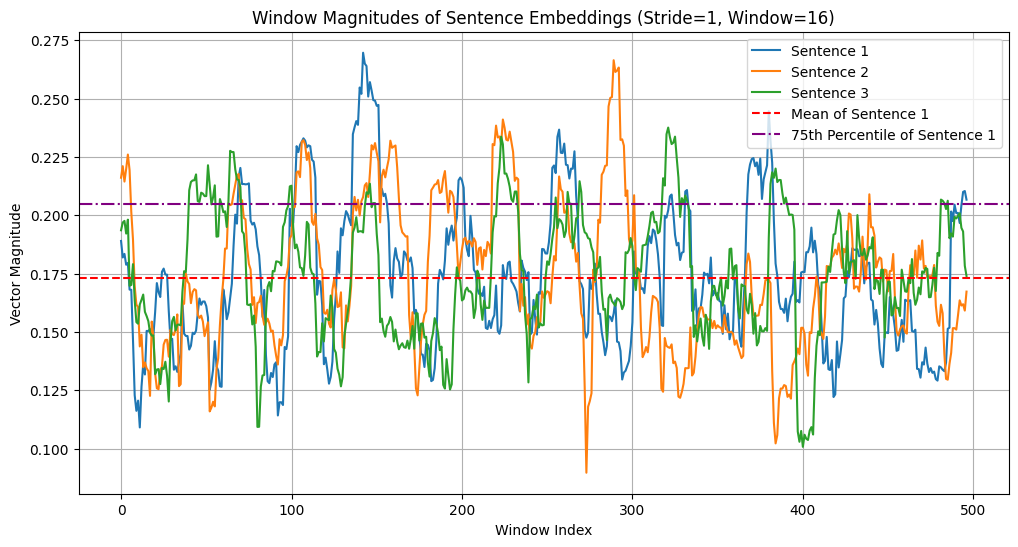

In [ ]:


# sentences = [
#     "I love sunny weather", # and going outside.",
#     "The weather forecast predicts sunshine today.",
#     "By region, the North American market is expected to grow from USD 354.81 million in 2022 to USD 640.44 million by 2029, registering a CAGR of 9.18%. The Asia-Pacific market is projected to expand from USD 698.14 million in 2022 to USD 1,268.48 million by 2029, growing at a CAGR of 9.72%. Additionally, the European market is forecast to reach USD 663.27 million by 2029 from USD 395.73 million in 2022, growing at a CAGR of 8.37%. Economic growth has slowed down significantly. Window Magnitudes of Sentence Embeddings."
# ]

sentences = [
    "I love sunny weather and going outside.",
    "The weather forecast predicts sunshine today.",
    "Economic growth has slowed down significantly."
]

embeddings = model(sentences)

window_size = 16
stride = 1
num_windows = (512 - window_size) // stride + 1
window_magnitudes = np.zeros((len(sentences), num_windows))

for idx, embedding in enumerate(embeddings):
    for i in range(num_windows):
        window = embedding[i:i + window_size]
        window_magnitudes[idx, i] = np.linalg.norm(window)

# 문장 1번의 평균값 및 상위 25% 값 계산
mean_value_sentence_0 = np.mean(window_magnitudes[0])
upper_25_percentile = np.percentile(window_magnitudes[2],85)

# 그래프 그리기
plt.figure(figsize=(12, 6))
for idx, sentence in enumerate(sentences):
    plt.plot(window_magnitudes[idx], label=f'Sentence {idx+1}')

# 평균값 라인 추가
plt.axhline(y=mean_value_sentence_0, color='red', linestyle='--', label='Mean of Sentence 1')

# 상위 25%(75%) 라인 추가
plt.axhline(y=upper_25_percentile, color='purple', linestyle='-.', label='75th Percentile of Sentence 1')

plt.title('Window Magnitudes of Sentence Embeddings (Stride=1, Window=16)')
plt.xlabel('Window Index')
plt.ylabel('Vector Magnitude')
plt.legend()
plt.grid(True)
plt.show()



Average Cosine Similarity with Sentence 2 (top 85% windows): 0.4176
Average Cosine Similarity with Sentence 3 (top 85% windows): -0.2439


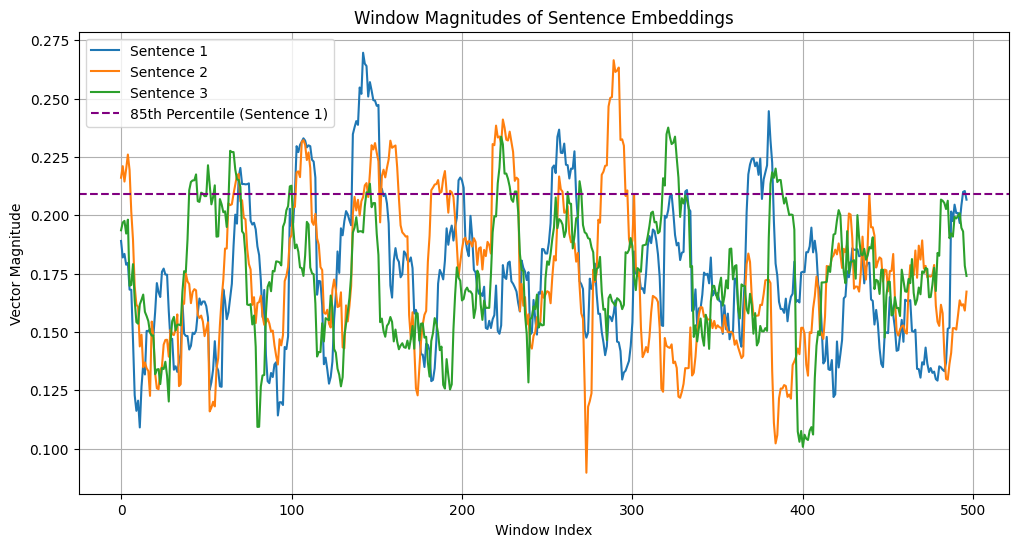

In [ ]:

import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# sentences = [
#     "LVDC 배전 시스템은 전력을 소비자에게 전달하는 네트워크를 포함한다.",            # 기준 문장
#     "태양광 발전 시스템은 LVDC 기술과의 결합이 용이하다. 태양광 패널에서 생성된 DC 전력은 직접 LVDC 배전 시스템에 공급될 수 있으며, 이는 변환 과정에서의 에너지 손실을 줄인다. 또한, 태양광 발전은 분산형 전력 생산을 가능하게 하여, 지역 사회의 에너지 자립도를 높인다. 태양광 발전의 장점은 그 자체로도 크지만, LVDC 시스템과 결합했을 때 더욱 두드러진다.",      # 유사 문장
#     "LVDC 배전 시스템은 전력을 소비자에게 전달하는 네트워크를 포함한다. 이 시스템은 전력 손실을 최소화하고, 전력 품질을 유지하기 위해 설계된다. LVDC 배전 시스템은 기존의 AC 배전 시스템에 비해 더 간단하고 효율적인 구조를 가지고 있다. LVDC 배전 시스템은 특히 분산형 전력 생산과의 통합에 유리하다. 예를 들어, 태양광 패널이나 풍력 터빈과 같은 신재생 에너지원에서 생성된 전력을 직접 LVDC 배전망에 연결할 수 있다. 이는 변환 과정에서의 에너지 손실을 줄이고, 전력 품질을 향상시킨다."      # 다른 문장
# ]
sentences = [
    "변환기는 전력 흐름을 조절하여 고효율 운전을 가능하게 하며, LVDC 배전 시스템은 소비자 전력 전달 네트워크를 포함한다.", # The converter enables high-efficiency operation by controlling the power flow, and the LVDC distribution system includes the consumer power delivery network." #변환기는 전력 흐름을 조절하여 고효율 운전을 가능하게 하며, LVDC 배전 시스템은 소비자 전력 전달 네트워크를 포함한다."
    "이러한 변환기는 전력 흐름을 조절하고, 다양한 전압 수준을 지원하는 데 필수적이다. 변환기의 효율성은 LVDC 시스템의 전체 성능에 큰 영향을 미친다. 고효율 변환기를 사용하면 전력 손실을 최소화할 수 있으며, 이는 시스템의 경제성을 높이는 데 기여한다. 최근에는 SiC(실리콘 카바이드) 및 GaN(갈륨 나이트라이드)와 같은 고속 스위칭 소자를 활용한 변환기가 개발되고 있으며, 이들은 더 높은 전력 밀도와 효율성을 제공한다. ### 1.1.2. 배전 시스템 LVDC 배전 시스템은 전력을 소비자에게 전달하는 네트워크를 포함한다.",
    "이는 시스템의 경제성을 높이는 데 기여한다. 최근에는 SiC(실리콘 카바이드) 및 GaN(갈륨 나이트라이드)와 같은 고속 스위칭 소자를 활용한 변환기가 개발되고 있으며, 이들은 더 높은 전력 밀도와 효율성을 제공한다.",
]

window_size = 16
stride = 1
num_windows = (512 - window_size) // stride + 1
window_magnitudes = np.zeros((len(sentences), num_windows))

# 윈도우 별 임베딩 분리 저장
windows_embeddings = np.zeros((len(sentences), num_windows, window_size))

for idx, embedding in enumerate(embeddings):
    for i in range(num_windows):
        window = embedding[i:i + window_size]
        windows_embeddings[idx, i] = window
        window_magnitudes[idx, i] = np.linalg.norm(window)

# 기준 문장(sentences[0])에서 상위 85% 크기 윈도우 인덱스 얻기
threshold_85 = np.percentile(window_magnitudes[0], 85)
high_magnitude_indices = np.where(window_magnitudes[0] >= threshold_85)[0]

# 유사도 계산 (기준 문장과 나머지 문장들)
for idx in range(1, len(sentences)):
    cosine_similarities = []
    for i in high_magnitude_indices:
        base_window = windows_embeddings[0, i].reshape(1, -1)
        compare_window = windows_embeddings[idx, i].reshape(1, -1)
        cosine_sim = cosine_similarity(base_window, compare_window)[0][0]
        cosine_similarities.append(cosine_sim)

    # 평균 유사도 출력
    avg_cosine_sim = np.mean(cosine_similarities)
    print(f"Average Cosine Similarity with Sentence {idx+1} (top 85% windows): {avg_cosine_sim:.4f}")

# 그래프 시각화
plt.figure(figsize=(12, 6))
for idx, sentence in enumerate(sentences):
    plt.plot(window_magnitudes[idx], label=f'Sentence {idx+1}')

plt.axhline(y=threshold_85, color='purple', linestyle='--', label='85th Percentile (Sentence 1)')
plt.title('Window Magnitudes of Sentence Embeddings')
plt.xlabel('Window Index')
plt.ylabel('Vector Magnitude')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
!pip install -U sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Sentence 2:
  - 일반 유사도: 0.8582
  - 상위 85% 윈도우 유사도: 0.8798
  - 일반 + 상위 85% 윈도우 유사도: 0.8690

Sentence 3:
  - 일반 유사도: 0.8582
  - 상위 85% 윈도우 유사도: 0.8798
  - 일반 + 상위 85% 윈도우 유사도: 0.8690

Sentence 4:
  - 일반 유사도: 0.0037
  - 상위 85% 윈도우 유사도: 0.0303
  - 일반 + 상위 85% 윈도우 유사도: 0.0170



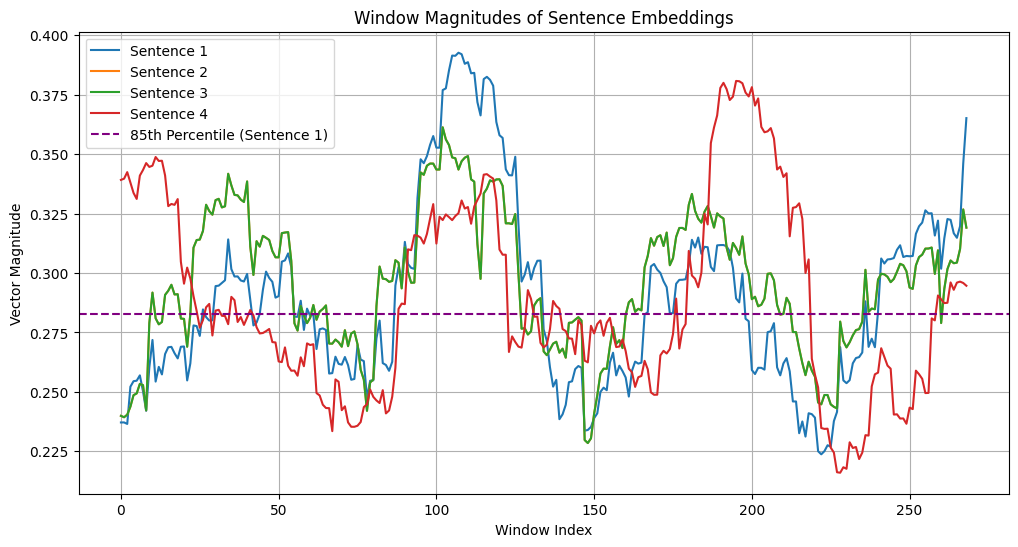

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# sentences = [
#     "이는 변환 과정에서의 에너지 손실을 줄이고, 전력 품질을 향상시킨다.",            # 기준 문장
#     "태양광 발전 시스템은 LVDC 기술과의 결합이 용이하다. 태양광 패널에서 생성된 DC 전력은 직접 LVDC 배전 시스템에 공급될 수 있으며, 이는 변환 과정에서의 에너지 손실을 줄인다. 또한, 태양광 발전은 분산형 전력 생산을 가능하게 하여, 지역 사회의 에너지 자립도를 높인다. 태양광 발전의 장점은 그 자체로도 크지만, LVDC 시스템과 결합했을 때 더욱 두드러진다.",      # 유사 문장
#     "LVDC 배전 시스템은 전력을 소비자에게 전달하는 네트워크를 포함한다. 이 시스템은 전력 손실을 최소화하고, 전력 품질을 유지하기 위해 설계된다. LVDC 배전 시스템은 기존의 AC 배전 시스템에 비해 더 간단하고 효율적인 구조를 가지고 있다. LVDC 배전 시스템은 특히 분산형 전력 생산과의 통합에 유리하다. 예를 들어, 태양광 패널이나 풍력 터빈과 같은 신재생 에너지원에서 생성된 전력을 직접 LVDC 배전망에 연결할 수 있다. 이는 변환 과정에서의 에너지 손실을 줄이고, 전력 품질을 향상시킨다.",
#     "LVDC (Low Voltage Direct Current) 기술은 전력 전송 및 분배 시스템에서 직류 전력을 활용하는 혁신적인 접근 방식이다. LVDC는 기존의 교류(AC) 시스템에 비해 여러 가지 장점을 제공하며, 특히 신재생 에너지 통합, 전력 손실 감소, 그리고 전력 품질 개선에 기여한다. 이러한 변환기는 전력 흐름을 조절하고, 다양한 전압 수준을 지원하는 데 필수적이다. 변환기의 효율성은 LVDC 시스템의 전체 성능에 큰 영향을 미친다. 고효율 변환기를 사용하면 전력 손실을 최소화할 수 있으며, 이는 시스템의 경제성을 높이는 데 기여한다. 최근에는 SiC(실리콘 카바이드) 및 GaN(갈륨 나이트라이드)와 같은 고속 스위칭 소자를 활용한 변환기가 개발되고 있으며, 이들은 더 높은 전력 밀도와 효율성을 제공한다."
#     # 다른 문장
# ]

sentences = [
    "변환기의 효율성은 LVDC 시스템의 전체 성능에 큰 영향을 미친다. 고효율 변환기를 사용하면 전력 손실을 최소화할 수 있으며, 이는 시스템의 경제성을 높이는 데 기여한다.",            # 기준 문장
    "변환기의 효율성은 LVDC 시스템의 전체 성능에 큰 영향을 미친다. 고효율 변환기를 사용하면 전력 손실을 최소화할 수 있으며, 이는 시스템의 경제성을 높이는 데 기여한다. ________________________________________________________________________________________________________________________________",      # 유사 문장
    "변환기의 효율성은 LVDC 시스템의 전체 성능에 큰 영향을 미친다. 고효율 변환기를 사용하면 전력 손실을 최소화할 수 있으며, 이는 시스템의 경제성을 높이는 데 기여한다. ________________________________________________________________________________________________________________________________ ________________________________________________________________________________________________________________________________",
    "________________________________________________________________________________________________________________________________ ________________________________________________________________________________________________________________________________ ________________________________________________________________________________________________________________________________ 변환기의 효율성은 LVDC 시스템의 전체 성능에 큰 영향을 미친다. 고효율 변환기를 사용하면 전력 손실을 최소화할 수 있으며, 이는 시스템의 경제성을 높이는 데 기여한다. "
    # 다른 문장
]
# sentences = [
#      "변환기는 전력 흐름을 조절하여 고효율 운전을 가능하게 한다.",
#      "이러한 변환기는 전력 흐름을 조절하고, 다양한 전압 수준을 지원하는 데 필수적이다. 변환기의 효율성은 LVDC 시스템의 전체 성능에 큰 영향을 미친다. 고효율 변환기를 사용하면 전력 손실을 최소화할 수 있다."
#  ]

embeddings = model.encode(sentences)

window_size = 32
stride =1
num_windows = (300 - window_size) // stride + 1
window_magnitudes = np.zeros((len(sentences), num_windows))

windows_embeddings = np.zeros((len(sentences), num_windows, window_size))

for idx, embedding in enumerate(embeddings):
    for i in range(num_windows):
        window = embedding[i:i + window_size]
        windows_embeddings[idx, i] = window
        window_magnitudes[idx, i] = np.linalg.norm(window)

# 기준 문장 상위 85% 크기 윈도우 인덱스
threshold_85 = np.percentile(window_magnitudes[0], 50)
high_magnitude_indices = np.where(window_magnitudes[0] >= threshold_85)[0]

# 유사도 계산 및 출력
for idx in range(1, len(sentences)):
    # 일반 유사도 계산
    general_cosine_sim = cosine_similarity(
        [embeddings[0]], [embeddings[idx]]
    )[0][0]

    # 상위 85% 윈도우 유사도 계산
    cosine_similarities = []
    for i in high_magnitude_indices:
        base_window = windows_embeddings[0, i].reshape(1, -1)
        compare_window = windows_embeddings[idx, i].reshape(1, -1)
        cosine_sim = cosine_similarity(base_window, compare_window)[0][0]
        cosine_similarities.append(cosine_sim)

    avg_top_85_cosine_sim = np.mean(cosine_similarities)

    print(f"Sentence {idx+1}:")
    print(f"  - 일반 유사도: {general_cosine_sim:.4f}")
    print(f"  - 상위 85% 윈도우 유사도: {avg_top_85_cosine_sim:.4f}")
    print(f"  - 일반 + 상위 85% 윈도우 유사도: {(general_cosine_sim + avg_top_85_cosine_sim)/2:.4f}\n")

# 그래프 시각화
plt.figure(figsize=(12, 6))
for idx, sentence in enumerate(sentences):
    plt.plot(window_magnitudes[idx], label=f'Sentence {idx+1}')

plt.axhline(y=threshold_85, color='purple', linestyle='--', label='85th Percentile (Sentence 1)')
plt.title('Window Magnitudes of Sentence Embeddings')
plt.xlabel('Window Index')
plt.ylabel('Vector Magnitude')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# # 한국어에 최적화된 다국어 임베딩 모델 사용 (bge-m3)
# model = SentenceTransformer('BAAI/bge-m3')

# 두 개의 문단 준비 (문장 위치가 서로 다름)
paragraph1 = "태양광 발전의 장점은 그 자체로도 크지만, LVDC 시스템과 결합했을 때 더욱 두드러진다."
paragraph2 = "태양광 발전 시스템은 LVDC 기술과의 결합이 용이하다. 태양광 패널에서 생성된 DC 전력은 직접 LVDC 배전 시스템에 공급될 수 있으며, 이는 변환 과정에서의 에너지 손실을 줄인다. 또한, 태양광 발전은 분산형 전력 생산을 가능하게 하여, 지역 사회의 에너지 자립도를 높인다. 태양광 발전의 장점은 그 자체로도 크지만, LVDC 시스템과 결합했을 때 더욱 두드러진다."

# 문단을 문장 단위로 나누기
sentences1 = paragraph1.split('. ')
sentences2 = paragraph2.split('. ')

# 각 문장의 임베딩 벡터 얻기
embeddings1 = model(sentences1)
embeddings2 = model(sentences2)

# 각 문장 임베딩 평균을 통해 문단의 의미 임베딩 표현 얻기
paragraph_embedding1 = np.mean(embeddings1, axis=0)
paragraph_embedding2 = np.mean(embeddings2, axis=0)

# 문단 간 코사인 유사도 계산
similarity = cosine_similarity(
    [paragraph_embedding1],
    [paragraph_embedding2]
)[0][0]

print(f'두 문단 간 유사도: {similarity:.4f}')


두 문단 간 유사도: 0.8127


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_text
import tensorflow_hub as hub

model_url = "https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3"
model = hub.load(model_url)

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import re

def paragraph_chunk_similarity(paragraph, chunk, model):
    # 문단과 청크를 문장 단위로 분리
    paragraph_sentences = paragraph.split('. ')
    chunk_sentences = chunk.split('. ')

    # 각 문장의 임베딩
    paragraph_embeddings = model(paragraph_sentences)
    chunk_embeddings = model(chunk_sentences)

    similarities = cosine_similarity(paragraph_embeddings, chunk_embeddings)
    print(similarities)

    max_similarity = np.max(similarities)
    avg_similarity = np.mean(similarities)

    # 전체 유사도 중 상위 10% 값의 평균 계산
    threshold_90 = np.percentile(similarities, 90)
    top_10_percent_avg_similarity = np.mean(similarities[similarities >= threshold_90])
    top_10_percent_sum_similarity = np.sum(similarities[similarities >= threshold_90])

  # [[ 0.42969006  0.51143306  0.3932774   0.27678925 -0.07910201  0.74176866]]
  # 최대 유사도: 0.7418, 평균 유사도: 0.3790, 상위 10% 평균 유사도: 0.7418, 상위 10% 합 유사도: 0.7418
  # 상기와 같이 10% 합이 1보다 작지만 최대유사도와 같을 경우 0.7이상이면 참조
    if max_similarity == top_10_percent_sum_similarity : top_10_percent_sum_similarity =1.0

    return max_similarity, avg_similarity, top_10_percent_avg_similarity, top_10_percent_sum_similarity


# 사용 예시
if __name__ == '__main__':

    paragraph =  "변환기는 전력 흐름을 조절하여 고효율 운전을 가능하게 하며 LVDC 배전 시스템은 소비자 전력 전달 네트워크를 포함한다." # The converter enables high-efficiency operation by controlling the power flow, and the LVDC distribution system includes the consumer power delivery network." #변환기는 전력 흐름을 조절하여 고효율 운전을 가능하게 하며, LVDC 배전 시스템은 소비자 전력 전달 네트워크를 포함한다."
    chunk = "이러한 변환기는 전력 흐름을 조절하고, 다양한 전압 수준을 지원하는 데 필수적이다. 변환기의 효율성은 LVDC 시스템의 전체 성능에 큰 영향을 미친다. 고효율 변환기를 사용하면 전력 손실을 최소화할 수 있으며, 이는 시스템의 경제성을 높이는 데 기여한다. 최근에는 SiC(실리콘 카바이드) 및 GaN(갈륨 나이트라이드)와 같은 고속 스위칭 소자를 활용한 변환기가 개발되고 있으며, 이들은 더 높은 전력 밀도와 효율성을 제공한다. ### 1.1.2. 배전 시스템 LVDC 배전 시스템은 전력을 소비자에게 전달하는 네트워크를 포함한다."
    max_sim, avg_sim, top_10_avg_sim, top_10_sum_sim = paragraph_chunk_similarity(paragraph, chunk, model)
    print(f"최대 유사도: {max_sim:.4f}, 평균 유사도: {avg_sim:.4f}, 상위 10% 평균 유사도: {top_10_avg_sim:.4f}, 상위 10% 합 유사도: {top_10_sum_sim:.4f}")

[[ 0.42969006  0.51143306  0.3932774   0.27678925 -0.07910201  0.74176866]]
최대 유사도: 0.7418, 평균 유사도: 0.3790, 상위 10% 평균 유사도: 0.7418, 상위 10% 합 유사도: 1.0000


In [ ]:

from langchain.embeddings import OpenAIEmbeddings
import numpy as np

embedding_model = OpenAIEmbeddings()

# 청크 내부 문장 리스트
sentences = [
    "This is the first sentence.",
    "This is the second sentence.",
    "This is the third one."
]

# 각 문장의 임베딩 구하기
sentence_embeddings = [embedding_model.embed_query(s) for s in sentences]

# 평균 임베딩
avg_embedding = np.mean(sentence_embeddings, axis=0)

ValidationError: 1 validation error for OpenAIEmbeddings
  Value error, Did not find openai_api_key, please add an environment variable `OPENAI_API_KEY` which contains it, or pass `openai_api_key` as a named parameter. [type=value_error, input_value={'model_kwargs': {}, 'cli...20, 'http_client': None}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/value_error

In [ ]:

pip install langchain openai faiss-cpu tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 43.5 MB/s eta 0:00:00


In [ ]:
pip install langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.4 MB/s eta 0:00:00
